The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data cannot be provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015


In [23]:
import pandas as pd
import numpy as np
from random import sample
#import libraries

In [24]:
df=pd.read_csv("creditcard.csv")
#Reading the dataset in a dataframe using Pandas

In [2]:
df
#Peek into what the dataset looks like

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [35]:
list(df.columns.values)
# list of features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [16]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [97]:
# give a count of fraudulent vs. genuine transactions and the ratio
x=df.groupby('Class').size()
print('There are', x[0], 'genuine transactions and', x[1], 'fraudulent transactions.')
print( '%.3f' % (x[1]/x[0]*100)+'%','of the transcations are fraudulent')

There are 284315 genuine transactions and 492 fraudulent transactions.
0.173% of the transcations are fraudulent


The problem is imbalanced - one class is highly represented, whereas the other only sparsely. Such problems require distinct learning techniques to deal with and the usual metric of accuracy is misleading. Indeed, if we classify ALL transactions as genuine we will have 99% accuracy!

Standard binary classification methods do not take transaction costs into account, assuming constant cost of misclassification errors. This approach is unrealistic in many real-world applications. For example in credit card
fraud detection, failing to detect a fraudulent transaction may have an economical impact from a few to thousands of Euros, depending on the particular transaction and card holder.

We shall now apply example-dependent cost-sensitive classification to the problem at hand.

In [18]:
!pip install costcla
# installs example-dependent cost-sensitive classification library (http://albahnsen.com/CostSensitiveClassification/)
!pip install seaborn
# installs seaborn, the statistical data visualization library

In [14]:
df.shape

(284807, 31)

In [18]:
df.iloc[28000]

Time      34806.000000
V1            0.519312
V2           -1.592259
V3            0.605950
V4           -0.490779
V5           -1.698899
V6           -0.496581
V7           -0.309327
V8            0.059010
V9            1.674584
V10          -1.037046
V11           1.261099
V12           1.021210
V13          -0.943261
V14           0.278159
V15           0.705410
V16          -0.236204
V17          -0.270914
V18           0.957069
V19           0.579148
V20           0.531257
V21           0.402284
V22           0.571295
V23          -0.414482
V24           0.566809
V25           0.410484
V26          -0.594853
V27           0.020218
V28           0.083239
Amount      348.000000
Class         0.000000
Name: 28000, dtype: float64

In [23]:
df.filter(items=['V1','Class'])

,V1,Class
0,-1.359807,0
1,1.191857,0
2,-1.358354,0
3,-0.966272,0
4,-1.158233,0
5,-0.425966,0
6,1.229658,0
7,-0.644269,0
8,-0.894286,0
9,-0.338262,0


In [9]:
from costcla.datasets import load_creditscoring1

In [4]:
data = load_creditscoring1()

In [13]:
data

{'DESCR': '2011 Kaggle competition Give Me Some Credit\n\nThis is a copy of the Kaggle dataset.\nhttp://www.kaggle.com/c/GiveMeSomeCredit/\n\n\nDescription:\n\nImprove on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.\n\nBanks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.\n\nCredit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.\n\nThe goal of this competition is to build a model that borrowers can use to help make the best financi

In [6]:
data = load_creditscoring1()

In [5]:
print(data.keys())

dict_keys(['data', 'target', 'DESCR', 'cost_mat', 'target_names', 'name', 'feature_names'])


In [6]:
target = pd.DataFrame(pd.Series(data.target).value_counts(), columns=('Frequency',))
target['Percentage'] = target['Frequency'] / target['Frequency'].sum()
target.index = ['Negative (Good Customers)', 'Positive (Bad Customers)']
print(target)

                           Frequency  Percentage
Negative (Good Customers)     105299    0.932551
Positive (Bad Customers)        7616    0.067449


In [7]:
pd.DataFrame(data.feature_names, columns=('Features',))

,Features
0,RevolvingUtilizationOfUnsecuredLines
1,age
2,NumberOfTime30-59DaysPastDueNotWorse
3,DebtRatio
4,MonthlyIncome
5,NumberOfOpenCreditLinesAndLoans
6,NumberOfTimes90DaysLate
7,NumberRealEstateLoansOrLines
8,NumberOfTime60-89DaysPastDueNotWorse
9,NumberOfDependents


In [10]:
# Load classifiers and split dataset in training and testing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test, cost_mat_train, cost_mat_test = \
train_test_split(data.data, data.target, data.cost_mat)

# Fit the classifiers using the training dataset
classifiers = {"RF": {"f": RandomForestClassifier()},
               "DT": {"f": DecisionTreeClassifier()},
               "LR": {"f": LogisticRegression()}}

for model in classifiers.keys():
    # Fit
    classifiers[model]["f"].fit(X_train, y_train)
    # Predict
    classifiers[model]["c"] = classifiers[model]["f"].predict(X_test)
    classifiers[model]["p"] = classifiers[model]["f"].predict_proba(X_test)
    classifiers[model]["p_train"] = classifiers[model]["f"].predict_proba(X_train)

In [11]:
# Evaluate the performance
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
measures = {"f1": f1_score, "pre": precision_score, 
            "rec": recall_score, "acc": accuracy_score}
results = pd.DataFrame(columns=measures.keys())

# Evaluate each model in classifiers
for model in classifiers.keys():
    results.loc[model] = [measures[measure](y_test, classifiers[model]["c"]) for measure in measures.keys()]

print(results)

         rec       acc        f1       pre
RF  0.155416  0.932587  0.237885  0.506826
DT  0.278388  0.894399  0.263041  0.249297
LR  0.011512  0.932339  0.022518  0.511628


    100% |████████████████████████████████| 163kB 1.8MB/s 
  Running setup.py bdist_wheel for seaborn ... - done
  Stored in directory: /home/etsuker/.cache/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


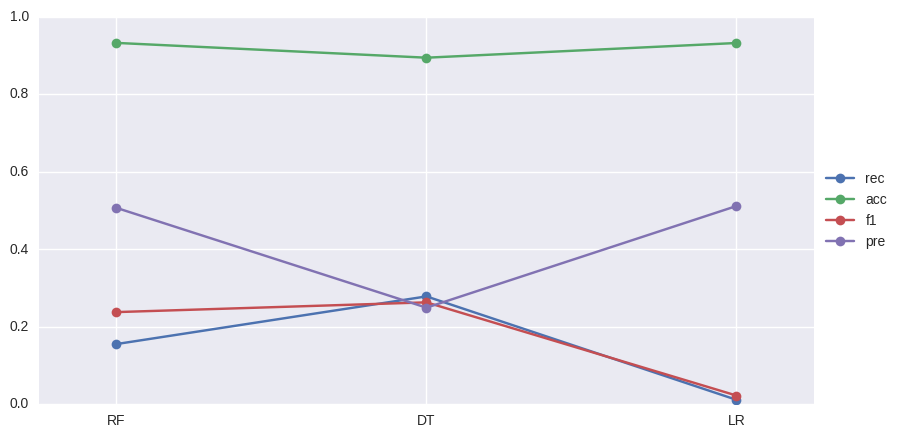

In [12]:
# Plot the results
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns

figsize(10, 5)
ax = plt.subplot(111)

ind = np.arange(results.shape[0])
width = 0.2
l = ax.plot(ind, results, "-o")
plt.legend(iter(l), results.columns.tolist(), loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim([-0.25, ind[-1]+.25])
ax.set_xticks(ind)
ax.set_xticklabels(results.index)
plt.show()

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

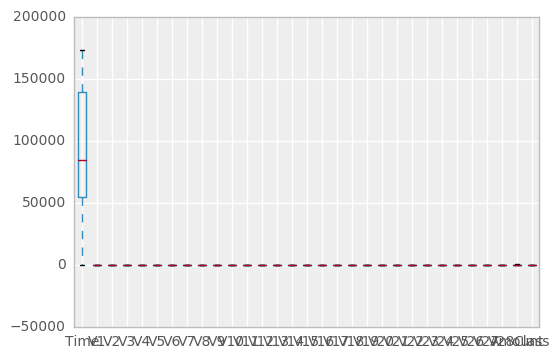

In [31]:

df.boxplot(return_type='axes')

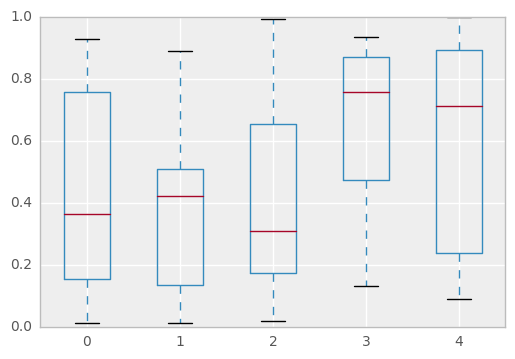

In [30]:
df2 = pd.DataFrame(np.random.rand(10,5))
df2.boxplot(return_type='axes')

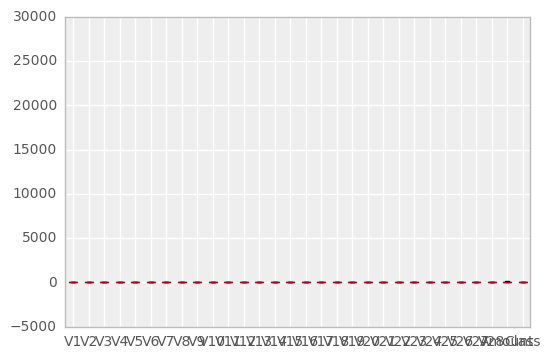

In [36]:
dfwithouttime = df.drop(['Time'],axis=1)
dfwithouttime.boxplot(return_type='axes')